In [ ]:
# Provide the path to the file in the /content directory
file_path = '/content/extracted_text.txt'

# Read the contents of the file
with open(file_path, 'r') as file:
    corpus = file.read()


In [ ]:
import re
def clean_text(text):

    text = re.sub(r'^Figure\s+\d+.*\n','',text,flags=re.MULTILINE)
    text = re.sub(r'^Table\s+\d+.*\n','',text,flags=re.MULTILINE)
    text = re.sub(r'\b\d{3}\s*\b', '', text)
    text = re.sub(r'\d{2}.\d\s', '', text , count=7)
    text = re.sub(r'\btThe\b', 'the', text, flags=re.MULTILINE)

    text = text.replace('↑', '')


    text = re.sub(r'\bPart\s+\d+\s+-\s+Guide\b', '', text)
    text = re.sub(r'^m.', '-', text, flags=re.MULTILINE)


    text = text.replace("â€”", " : ")
    text = text.replace("â€™s","'s")
    text = text.replace('Â®', '')
    text = text.replace("@",'')
    text = text.replace(":",'')


    text = text.lower()
    return text

# Clean the text

content = clean_text(corpus)

# Print or save the cleaned text





In [ ]:
# Split the text content into lines
lines = content.splitlines()

# Initialize a variable to store non-empty lines
non_empty_lines = []

# Iterate through the lines and only keep non-empty lines
for line in lines:
    if line.strip():  # Check if the line is not empty after stripping whitespace
        non_empty_lines.append(line)

# Join the non-empty lines to form the cleaned content
cleaned_content = "\n".join(non_empty_lines)


In [ ]:
print(cleaned_content)

project risk management
project risk management includes the processes of conducting risk management planning, identification, analysis,
response planning, response implementation, and monitoring risk on a project. the objectives of project risk management
are to increase the probability and/or impact of positive risks and to decrease the probability and/or impact of negative
risks, in order to optimize the chances of project success.
the project risk management processes are
plan risk management—the process of defining how to conduct risk management activities for a project.
identify risks—the process of identifying individual project risks as well as sources of overall project risk,
and documenting their characteristics.
perform qualitative risk analysis—the process of prioritizing individual project risks for further analysis
or action by assessing their probability of occurrence and impact as well as other characteristics.
perform quantitative risk analysis—the process of numerical

In [ ]:
import re

# Dictionnaire pour stocker les titres et leurs valeurs
resultat = {}

# Initialisez une variable pour le titre en cours
titre_en_cours = None

# Parcourez chaque ligne et construisez le dictionnaire
for ligne in cleaned_content.splitlines():
    # Supprimez les espaces en début et en fin de ligne pour éviter les faux positifs
    ligne = ligne.strip()

    # Utilisez une expression régulière pour vérifier si la ligne matches le pattern
    match = re.match(r'^(\d+\.\d+(?:\.\d+)*)(?:\s+(.*))?', ligne)

    if match:
        # Si un nouveau titre est trouvé, mettez-le dans la variable titre_en_cours
        titre_en_cours = "Titre: " + match.group(1)
        if match.group(2):
            # If there is text associated with the title, add it to the title
            titre_en_cours += " " + match.group(2)
        # Initialisez la valeur du titre en cours comme une liste vide
        resultat[titre_en_cours] = []

    elif titre_en_cours:
        # Si le titre en cours est défini, ajoutez la ligne à sa valeur
        resultat[titre_en_cours].append(ligne)

# Concaténez les valeurs trouvées dans le dictionnaire lui-même
for titre in resultat:
    # Utilisez .join() pour concaténer les valeurs trouvées sous chaque titre
    resultat[titre] = "\n".join(resultat[titre])

# Affichez le dictionnaire résultant avec les valeurs concaténées
for titre, valeur in resultat.items():
    print(titre)
    print("Valeurs:", valeur)


Titre: 11.1 plan risk management
Valeurs: plan risk management is the process of defining how to conduct risk management activities for a project. the key
benefit of this process is that it ensures that the degree, type, and visibility of risk management are proportionate to both
risks and the importance of the project to the organization and other stakeholders. this process is performed once or
at predefined points in the project. the inputs, tools and techniques, and outputs of the process are depicted in figure
11-2. figure 11-3 depicts the data flow diagram for the process.
the plan risk management process should begin when a project is conceived and should be completed early in the
project. it may be necessary to revisit this process later in the project life cycle, for example at a major phase change, or
if the project scope changes significantly, or if a subsequent review of risk management effectiveness determines that
the project risk management process requires modification.


In [ ]:
import pandas as pd

# Assuming you already have the 'resultat' dictionary

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(list(resultat.items()), columns=['Title', 'Value'])

# Handle empty values (replace with NaN)
df['Value'].replace('', pd.NA, inplace=True)

# Now, you have a Pandas DataFrame where empty values are replaced with NaN (Pandas' representation of missing data).


In [ ]:
df

Title  \
0                     Titre: 11.1 plan risk management   
1            Titre: 11.1.1 plan risk management inputs   
2                      Titre: 11.1.1.1 project charter   
3              Titre: 11.1.1.2 project management plan   
4                    Titre: 11.1.1.3 project documents   
..                                                 ...   
106       Titre: 11.7.3.1 work performance information   
107                    Titre: 11.7.3.2 change requests   
108    Titre: 11.7.3.3 project management plan updates   
109          Titre: 11.7.3.4 project documents updates   
110  Titre: 11.7.3.5 organizational process assets ...   

                                                 Value  
0    plan risk management is the process of definin...  
1                                                 <NA>  
2    described in section 4.1.3.1. the project char...  
3    described in section 4.2.3.1. in planning proj...  
4    project documents that can be considered as in...  
..                                                 ...  
106  described in section 4.5.1.3. work performance...  
107  described in section 4.3.3.4. the monitor risk...  
108  any change to the project management plan goes...  
109  project documents that may be updated as a res...  
110  organizational process assets that are updated...  

[111 rows x 2 columns]

In [ ]:
import pandas as pd

# Assuming you already have the 'resultat' dictionary

# Convert the dictionary to a Pandas DataFrame
df2 = pd.DataFrame(list(resultat.items()), columns=['Title', 'Value'])

# Replace NaN values in the 'Value' column with empty strings
df2['Value'].fillna('', inplace=True)

# Function to replace empty values with concatenated values
def replace_empty_with_concatenated_values(row):
    value = row['Value']
    title = row['Title']
    if value == '':  # Check for empty values
        first_part = title.split(' ')[1]
        # Filter out the specific title you want to exclude
        matching_titles = df2[
            (df2['Title'] != 'Titre: 11.1.1 plan risk management inputs') &  # Exclude the specific title
            df2['Title'].str.split(' ').str[1].str.startswith(first_part)
        ]
        # Concatenate the titles and values, excluding the specific title
        concatenated_values = '\n'.join(matching_titles['Title']+'\n'+ matching_titles['Value'] + '\n')
        return concatenated_values
    return value

# Apply the function to replace empty values with concatenated values
df2['Value'] = df2.apply(replace_empty_with_concatenated_values, axis=1)

# Now, you have empty values replaced by concatenated values for titles with the same first three numbers.


In [ ]:
df2['Value'].iloc[1]

"Titre: 11.1.1.1 project charter\ndescribed in section 4.1.3.1. the project charter documents the high-level project description and boundaries, high-\nlevel requirements, and risks.\n\nTitre: 11.1.1.2 project management plan\ndescribed in section 4.2.3.1. in planning project risk management, all approved subsidiary management plans\nshould be taken into consideration in order to make the risk management plan consistent with them. the methodology\noutlined in other project management plan components might influence the plan risk management process.\n\nTitre: 11.1.1.3 project documents\nproject documents that can be considered as inputs for this process include but are not limited to the stakeholder\nregister as described in section 13.1.3.1. the stakeholder register contains details of the project's stakeholders and\nprovides an overview of their project roles and their attitude toward risk on this project. this is useful in determining\nroles and responsibilities for managing risk on 

In [ ]:
import pandas as pd
df3 = df2

df3['Value'].fillna('', inplace=True)
def replace_empty_with_concatenated_values(row):
    value = row['Value']
    title = row['Title']
    if value == '':
        first_part = title.split(' ')[1]
        # Filter out the specific title you want to exclude
        matching_titles = df3[
            (df3['Title'] != title) &  # Exclude the current title
            df3['Title'].str.split(' ').str[1].str.startswith(first_part)
        ]
        # Concatenate the titles and values, excluding the current title
        concatenated_values = '\n'.join(matching_titles['Title'] + '\n' + matching_titles['Value'] + '\n')
        return concatenated_values
    return value

# Iterate through the DataFrame and apply the function to rows with empty values
for index, row in df3.iterrows():
    if row['Value'] == '':
        new_value = replace_empty_with_concatenated_values(row)
        df3.at[index, 'Value'] = new_value

'''pour les titres qui se composent de 3 chiffres comme 11.\d.\d qui n'ont pas de definition avant le premier sous titres
 pour qu'on puisse l'affecter a la colone value , on leurs affecte comme valeur leurs sous titres 11.\d.\d.\d et leurs contenus'''

"pour les titres qui se composent de 3 chiffres comme 11.\\d.\\d qui n'ont pas de definition avant le premier sous titres\n pour qu'on puisse l'affecter a la colone value , on leurs affecte comme valeur leurs sous titres 11.\\d.\\d.\\d et leurs contenus"

In [ ]:
df3

Title  \
0                     Titre: 11.1 plan risk management   
1            Titre: 11.1.1 plan risk management inputs   
2                      Titre: 11.1.1.1 project charter   
3              Titre: 11.1.1.2 project management plan   
4                    Titre: 11.1.1.3 project documents   
..                                                 ...   
106       Titre: 11.7.3.1 work performance information   
107                    Titre: 11.7.3.2 change requests   
108    Titre: 11.7.3.3 project management plan updates   
109          Titre: 11.7.3.4 project documents updates   
110  Titre: 11.7.3.5 organizational process assets ...   

                                                 Value  
0    plan risk management is the process of definin...  
1    Titre: 11.1.1.1 project charter\ndescribed in ...  
2    described in section 4.1.3.1. the project char...  
3    described in section 4.2.3.1. in planning proj...  
4    project documents that can be considered as in...  
..                                                 ...  
106  described in section 4.5.1.3. work performance...  
107  described in section 4.3.3.4. the monitor risk...  
108  any change to the project management plan goes...  
109  project documents that may be updated as a res...  
110  organizational process assets that are updated...  

[111 rows x 2 columns]

In [ ]:
df3['Value'] = df3['Value'].str.replace('Titre: ', '')
df3['Title'] = df3['Title'].str.replace('Titre: ', '')

In [ ]:
df3

Title  \
0                         11.1 plan risk management   
1                11.1.1 plan risk management inputs   
2                          11.1.1.1 project charter   
3                  11.1.1.2 project management plan   
4                        11.1.1.3 project documents   
..                                              ...   
106           11.7.3.1 work performance information   
107                        11.7.3.2 change requests   
108        11.7.3.3 project management plan updates   
109              11.7.3.4 project documents updates   
110  11.7.3.5 organizational process assets updates   

                                                 Value  
0    plan risk management is the process of definin...  
1    11.1.1.1 project charter\ndescribed in section...  
2    described in section 4.1.3.1. the project char...  
3    described in section 4.2.3.1. in planning proj...  
4    project documents that can be considered as in...  
..                                                 ...  
106  described in section 4.5.1.3. work performance...  
107  described in section 4.3.3.4. the monitor risk...  
108  any change to the project management plan goes...  
109  project documents that may be updated as a res...  
110  organizational process assets that are updated...  

[111 rows x 2 columns]

In [ ]:
def clean_text(text):
    # Remove HTML tags using regular expressions

    # Replace newline characters with spaces
    clean_text_result = text.replace("\n", " ")
    # Remove extra spaces and special characters
    clean_text_result = ' '.join(clean_text_result.split())
    return clean_text_result

df3['Value'] = df3['Value'].apply(clean_text)
print(df3['Value'][0])


plan risk management is the process of defining how to conduct risk management activities for a project. the key benefit of this process is that it ensures that the degree, type, and visibility of risk management are proportionate to both risks and the importance of the project to the organization and other stakeholders. this process is performed once or at predefined points in the project. the inputs, tools and techniques, and outputs of the process are depicted in figure 11-2. figure 11-3 depicts the data flow diagram for the process. the plan risk management process should begin when a project is conceived and should be completed early in the project. it may be necessary to revisit this process later in the project life cycle, for example at a major phase change, or if the project scope changes significantly, or if a subsequent review of risk management effectiveness determines that the project risk management process requires modification.


In [ ]:
! pip install transformers
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text2text-generation", model="ml6team/keyphrase-generation-keybart-inspec")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 41.5 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

# Define the pipeline
pipe = pipeline("text2text-generation", model="ml6team/keyphrase-generation-keybart-inspec")

# Function to split long text into smaller segments
def split_text(text, max_length):
    segments = []
    current_segment = ""
    for word in text.split():
        if len(current_segment) + len(word) + 1 <= max_length:
            current_segment += " " + word
        else:
            segments.append(current_segment)
            current_segment = word
    if current_segment:
        segments.append(current_segment)
    return segments

# Iterate through the rows of df3
for index, row in df3.iterrows():
    input_text = row['Value']  # Use 'Value' column from df3

    # Split the long input text into segments that fit the model's maximum sequence length
    segments = split_text(input_text, max_length=1024)

    keyphrases = []
    for segment in segments:
        segment_keyphrases = pipe(segment, max_length=150, do_sample=True, temperature=0.7, top_k=50)
        keyphrases.extend([kp['generated_text'] for kp in segment_keyphrases])

    # Add the keyphrases to a new column 'keyphrases' in df3
    df3.at[index, 'keyphrases'] = ', '.join(keyphrases)



In [ ]:
df3

Title  \
0                         11.1 plan risk management   
1                11.1.1 plan risk management inputs   
2                          11.1.1.1 project charter   
3                  11.1.1.2 project management plan   
4                        11.1.1.3 project documents   
..                                              ...   
106           11.7.3.1 work performance information   
107                        11.7.3.2 change requests   
108        11.7.3.3 project management plan updates   
109              11.7.3.4 project documents updates   
110  11.7.3.5 organizational process assets updates   

                                                 Value  \
0    plan risk management is the process of definin...   
1    11.1.1.1 project charter described in section ...   
2    described in section 4.1.3.1. the project char...   
3    described in section 4.2.3.1. in planning proj...   
4    project documents that can be considered as in...   
..                                                 ...   
106  described in section 4.5.1.3. work performance...   
107  described in section 4.3.3.4. the monitor risk...   
108  any change to the project management plan goes...   
109  project documents that may be updated as a res...   
110  organizational process assets that are updated...   

                                            keyphrases  
0    plan risk management ; risk management activit...  
1    project charter ; high-level project descripti...  
2    project charter ; high-level project descripti...  
3    project risk management ; approved subsidiary ...  
4    stakeholder register ; project roles ; risk ; ...  
..                                                 ...  
106  work performance information ; project risk ma...  
107  monitor risks process ; change request ; proje...  
108  project management plan ; change control proce...  
109  project documents ; monitor risks process ; as...  
110  organizational process assets ; monitor risks ...  

[111 rows x 3 columns]

In [ ]:
import pandas as pd

file_path = '/content/pmbok-dataframe.csv'

df4 = pd.read_csv(file_path)

df4


Titre  \
0                        11.1 PLAN RISK MANAGEMENT   
1                         11.1.1.1 PROJECT CHARTER   
2                 11.1.1.2 PROJECT MANAGEMENT PLAN   
3                       11.1.1.3 PROJECT DOCUMENTS   
4        11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS   
..                                             ...   
84           11.7.3.1 WORK PERFORMANCE INFORMATION   
85                        11.7.3.2 CHANGE REQUESTS   
86        11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES   
87              11.7.3.4 PROJECT DOCUMENTS UPDATES   
88  11.7.3.5 ORGANIZATIONAL PROCESS ASSETS UPDATES   

                                               Valeur  \
0   Plan Risk Management is the process of definin...   
1   Described in Section 4.1.3.1. The project char...   
2   Described in Section 4.2.3.1. In planning Proj...   
3   Project documents that can be considered as in...   
4   The enterprise environmental factors that can ...   
..                                                ...   
84  Described in Section 4.5.1.3. Work performance...   
85  Described in Section 4.3.3.4. The Monitor Risk...   
86  Any change to the project management plan goes...   
87  Project documents that may be updated as a res...   
88  Organizational process assets that are updated...   

                                           URL_Figure  \
0   [['Figure 11-2. Plan Risk Management: Inputs, ...   
1                                                  []   
2                                                  []   
3                                                  []   
4                                                  []   
..                                                ...   
84                                                 []   
85                                                 []   
86                                                 []   
87                                                 []   
88                                                 []   

                  reference_figure  \
0   ['Figure 11-2', 'Figure 11-3']   
1                               []   
2                               []   
3                               []   
4                               []   
..                             ...   
84                              []   
85                              []   
86                              []   
87                              []   
88                              []   

                                           keyphrases  
0   plan risk management ; risk management activit...  
1   project charter ; high-level project descripti...  
2   project risk management ; approved subsidiary ...  
3   stakeholder register ; project roles ; risk ; ...  
4   enterprise environmental factors ; plan risk m...  
..                                                ...  
84  work performance information ; project risk ma...  
85  monitoring process ; change request ; project ...  
86  project management plan ; change control proce...  
87  project documents ; monitor risks process ; as...  
88  organizational process assets ; monitor risks ...  

[89 rows x 5 columns]

In [ ]:
df4['Titre'] = df4['Titre'].str.lower()


In [ ]:
# Merge 'URL_Figure' and 'reference_figure' from df4 into df3
merged_df3 = df3.merge(df4[['Titre', 'URL_Figure', 'reference_figure']], left_on='Title', right_on='Titre', how='left')

# Drop the 'Titre' column from the merged dataframe
merged_df3.drop('Titre', axis=1, inplace=True)

# Reorder the columns to place 'URL_Figure' and 'reference_figure' in front
merged_df3 = merged_df3[['Title', 'Value', 'URL_Figure', 'reference_figure', 'keyphrases']]

# Display the merged DataFrame
merged_df3


Title  \
0                         11.1 plan risk management   
1                11.1.1 plan risk management inputs   
2                          11.1.1.1 project charter   
3                  11.1.1.2 project management plan   
4                        11.1.1.3 project documents   
..                                              ...   
106           11.7.3.1 work performance information   
107                        11.7.3.2 change requests   
108        11.7.3.3 project management plan updates   
109              11.7.3.4 project documents updates   
110  11.7.3.5 organizational process assets updates   

                                                 Value  \
0    plan risk management is the process of definin...   
1    11.1.1.1 project charter described in section ...   
2    described in section 4.1.3.1. the project char...   
3    described in section 4.2.3.1. in planning proj...   
4    project documents that can be considered as in...   
..                                                 ...   
106  described in section 4.5.1.3. work performance...   
107  described in section 4.3.3.4. the monitor risk...   
108  any change to the project management plan goes...   
109  project documents that may be updated as a res...   
110  organizational process assets that are updated...   

                                            URL_Figure  \
0    [['Figure 11-2. Plan Risk Management: Inputs, ...   
1                                                  NaN   
2                                                   []   
3                                                   []   
4                                                   []   
..                                                 ...   
106                                                 []   
107                                                 []   
108                                                 []   
109                                                 []   
110                                                 []   

                   reference_figure  \
0    ['Figure 11-2', 'Figure 11-3']   
1                               NaN   
2                                []   
3                                []   
4                                []   
..                              ...   
106                              []   
107                              []   
108                              []   
109                              []   
110                              []   

                                            keyphrases  
0    plan risk management ; risk management activit...  
1    project charter ; high-level project descripti...  
2    project charter ; high-level project descripti...  
3    project risk management ; approved subsidiary ...  
4    stakeholder register ; project roles ; risk ; ...  
..                                                 ...  
106  work performance information ; project risk ma...  
107  monitor risks process ; change request ; proje...  
108  project management plan ; change control proce...  
109  project documents ; monitor risks process ; as...  
110  organizational process assets ; monitor risks ...  

[111 rows x 5 columns]

In [ ]:
merged_df3.head(5)


Title  \
0           11.1 plan risk management   
1  11.1.1 plan risk management inputs   
2            11.1.1.1 project charter   
3    11.1.1.2 project management plan   
4          11.1.1.3 project documents   

                                               Value  \
0  plan risk management is the process of definin...   
1  11.1.1.1 project charter described in section ...   
2  described in section 4.1.3.1. the project char...   
3  described in section 4.2.3.1. in planning proj...   
4  project documents that can be considered as in...   

                                          URL_Figure  \
0  [['Figure 11-2. Plan Risk Management: Inputs, ...   
1                                                NaN   
2                                                 []   
3                                                 []   
4                                                 []   

                 reference_figure  \
0  ['Figure 11-2', 'Figure 11-3']   
1                             NaN   
2                              []   
3                              []   
4                              []   

                                          keyphrases  
0  plan risk management ; risk management activit...  
1  project charter ; high-level project descripti...  
2  project charter ; high-level project descripti...  
3  project risk management ; approved subsidiary ...  
4  stakeholder register ; project roles ; risk ; ...

In [ ]:
# Apply the transformation to the 'keyphrases' column
merged_df3['keyphrases'] = merged_df3['keyphrases'].apply(lambda x: '[' + ', '.join([keyphrase.strip() for keyphrase in x.split(';')]) + ']')

# Display the updated DataFrame
merged_df3



Title  \
0                         11.1 plan risk management   
1                11.1.1 plan risk management inputs   
2                          11.1.1.1 project charter   
3                  11.1.1.2 project management plan   
4                        11.1.1.3 project documents   
..                                              ...   
106           11.7.3.1 work performance information   
107                        11.7.3.2 change requests   
108        11.7.3.3 project management plan updates   
109              11.7.3.4 project documents updates   
110  11.7.3.5 organizational process assets updates   

                                                 Value  \
0    plan risk management is the process of definin...   
1    11.1.1.1 project charter described in section ...   
2    described in section 4.1.3.1. the project char...   
3    described in section 4.2.3.1. in planning proj...   
4    project documents that can be considered as in...   
..                                                 ...   
106  described in section 4.5.1.3. work performance...   
107  described in section 4.3.3.4. the monitor risk...   
108  any change to the project management plan goes...   
109  project documents that may be updated as a res...   
110  organizational process assets that are updated...   

                                            URL_Figure  \
0    [['Figure 11-2. Plan Risk Management: Inputs, ...   
1                                                  NaN   
2                                                   []   
3                                                   []   
4                                                   []   
..                                                 ...   
106                                                 []   
107                                                 []   
108                                                 []   
109                                                 []   
110                                                 []   

                   reference_figure  \
0    ['Figure 11-2', 'Figure 11-3']   
1                               NaN   
2                                []   
3                                []   
4                                []   
..                              ...   
106                              []   
107                              []   
108                              []   
109                              []   
110                              []   

                                            keyphrases  
0    [plan risk management, risk management activit...  
1    [project charter, high-level project descripti...  
2    [project charter, high-level project descripti...  
3    [project risk management, approved subsidiary ...  
4    [stakeholder register, project roles, risk, pr...  
..                                                 ...  
106  [work performance information, project risk ma...  
107  [monitor risks process, change request, projec...  
108  [project management plan, change control proce...  
109  [project documents, monitor risks process, ass...  
110  [organizational process assets, monitor risks ...  

[111 rows x 5 columns]

In [ ]:
merged_df3['keyphrases'].iloc[0]

'[plan risk management, risk management activities, project life cycle, major phase change, project scope change, risk manager effectiveness, management of change, manufacturing industry, software deployment, supply chains]'

In [ ]:
# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("Babelscape/rebel-large")
model = AutoModelForSeq2SeqLM.from_pretrained("Babelscape/rebel-large")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def extract_relations_from_model_output(text):
    relations = []
    relation, subject, relation, object_ = '', '', '', ''
    text = text.strip()
    current = 'x'
    text_replaced = text.replace("<s>", "").replace("<pad>", "").replace("</s>", "")
    for token in text_replaced.split():
        if token == "<triplet>":
            current = 't'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
                relation = ''
            subject = ''
        elif token == "<subj>":
            current = 's'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
            object_ = ''
        elif token == "<obj>":
            current = 'o'
            relation = ''
        else:
            if current == 't':
                subject += ' ' + token
            elif current == 's':
                object_ += ' ' + token
            elif current == 'o':
                relation += ' ' + token
    if subject != '' and relation != '' and object_ != '':
        relations.append({
            'head': subject.strip(),
            'type': relation.strip(),
            'tail': object_.strip()
        })
    return relations

In [ ]:
class KB():
    def __init__(self):
        self.relations = []

    def are_relations_equal(self, r1, r2):
        return all(r1[attr] == r2[attr] for attr in ["head", "type", "tail"])

    def exists_relation(self, r1):
        return any(self.are_relations_equal(r1, r2) for r2 in self.relations)

    def add_relation(self, r):
        if not self.exists_relation(r):
            self.relations.append(r)

    def save(self):
        dict_list = []
        for r in self.relations:
            dict_list.append(r)
        return(dict_list)
        #df = pd.DataFrame(dict_list, columns=['head', 'type', 'tail'])
        #print(dict_list)

In [ ]:
def from_small_text_to_kb(text, verbose=False):
    kb = KB()

    # Tokenizer text
    model_inputs = tokenizer(text, max_length=512, padding=True, truncation=True,
                            return_tensors='pt')
    if verbose:
        print(f"Num tokens: {len(model_inputs['input_ids'][0])}")

    # Generate
    gen_kwargs = {
        "max_length": 1000,
        "length_penalty": 0,
        "num_beams": 3,
        "num_return_sequences": 3
    }

    generated_tokens = model.generate(
        **model_inputs,
        **gen_kwargs,
    )

    decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=False)

    # create kb
    for sentence_pred in decoded_preds:
        relations = extract_relations_from_model_output(sentence_pred)
        for r in relations:
            kb.add_relation(r)

    return kb

In [ ]:
from tqdm import tqdm
relation_list =[]
for item in tqdm(merged_df3['Value']):
    kb = from_small_text_to_kb(item, verbose=False) #verbose = True to return the number of tokens in each sentence
    relation_list.append(kb.save())

100%|██████████| 111/111 [10:11<00:00,  5.51s/it]


In [ ]:
dict_list =[]
for item in tqdm(relation_list):
    for dic in item:
        dict_list.append(dic)
triplet = pd.DataFrame(dict_list, columns=['head', 'type', 'tail'])

100%|██████████| 111/111 [00:00<00:00, 25041.29it/s]


In [ ]:
triplet

head         type                   tail
0                     project      part of     project life cycle
1        plan risk management  subclass of        risk management
2        plan risk management     facet of                project
3    risk breakdown structure     facet of                   risk
4    risk breakdown structure     facet of        risk management
..                        ...          ...                    ...
334             risk register          use        risk management
335             risk register     facet of  monitor risks process
336             risk register      part of   risk management plan
337             risk register          use   risk management plan
338      risk management plan     has part          risk register

[339 rows x 3 columns]

In [ ]:
unique_triplets = triplet.drop_duplicates()

In [ ]:
unique_triplets.shape

(253, 3)

In [ ]:
unique_triplets

head         type                     tail
0                     project      part of       project life cycle
1        plan risk management  subclass of          risk management
2        plan risk management     facet of                  project
3    risk breakdown structure     facet of                     risk
4    risk breakdown structure     facet of          risk management
..                        ...          ...                      ...
330            change request     facet of           change control
331            change control     facet of  project management plan
332    change control process     facet of  project management plan
335             risk register     facet of    monitor risks process
338      risk management plan     has part            risk register

[253 rows x 3 columns]

In [ ]:
tiplet_unique = triplet['head'].unique()

In [ ]:
final_triplet_unique = triplet.drop_duplicates(keep='first')

In [ ]:
final_triplet_unique = final_triplet_unique.reset_index(drop=True)

In [ ]:
final_triplet_unique

head         type                     tail
0                     project      part of       project life cycle
1        plan risk management  subclass of          risk management
2        plan risk management     facet of                  project
3    risk breakdown structure     facet of                     risk
4    risk breakdown structure     facet of          risk management
..                        ...          ...                      ...
248            change request     facet of           change control
249            change control     facet of  project management plan
250    change control process     facet of  project management plan
251             risk register     facet of    monitor risks process
252      risk management plan     has part            risk register

[253 rows x 3 columns]

In [ ]:
unique_heads = final_triplet_unique['head'].unique()
print(unique_heads)

['project' 'plan risk management' 'risk breakdown structure'
 'risk classification' 'project description' 'project charter'
 'project management plan' 'project risk management' 'risk thresholds'
 'risk threshold' 'risk management' 'risk register' 'risk policy' 'risk'
 'risk -nagement plan' 'enterprise risk management' 'stakeholder analysis'
 'project manager' 'project team' 'risk management plan'
 'project management' 'cost estimates' 'project requirements' 'award'
 'milestone date' 'project risk' 'external procurement' 'procurement'
 'risk database' 'checklists' 'project file' 'risk statement'
 'brainstorming' 'risks' 'project documents' 'facilitation' 'probability'
 'risk analysis' 'uncertainty' 'risk workshop' 'cause(s)' 'cause' 'effect'
 'qualitative risk analysis' 'quantitative risk analysis' '-de' 'bias'
 'risk databases' 'qualitative' 'risk data quality' 'expert judgment'
 'expertise' 'semi-structured interview' 'structured' 'timeliness'
 'sources of risk' 'hierarchy' 'probabili

In [ ]:
Titles = merged_df3['Title2'].unique()
print(Titles)

['plan risk management' 'plan risk management inputs' 'project charter'
 'project management plan' 'project documents'
 'enterprise environmental factors' 'organizational process assets'
 'plan risk management tools and techniques' 'expert judgment'
 'data analysis' 'meetings' 'plan risk management outputs'
 'risk management plan' 'identify risks' 'identify risks inputs'
 'agreements' 'procurement documentation'
 'identify risks tools and techniques' 'data gathering'
 'interpersonal and team skills' '' 'prompt lists'
 'identify risks outputs' 'risk register' 'risk report'
 'project documents updates' 'perform qualitative risk analysis'
 'perform qualitative risk analysis inputs'
 'perform qualitative risk analysis tools and techniques'
 'risk categorization' 'data representation'
 'perform qualitative risk analysis outputs'
 'perform quantitative risk analysis'
 'perform quantitative risk analysis inputs'
 'perform quantitative risk analysis tools and techniques'
 'representations of u

In [ ]:
unique_heads = final_triplet_unique['head'].unique()
unique_titles = merged_df3['Title2'].unique()

common_items = set(unique_heads) & set(unique_titles)

print("Common items between 'head' and 'Title2':")
print(common_items)


Common items between 'head' and 'Title2':
{'expert judgment', 'contingent response strategies', 'work performance data', 'plan risk management', 'risk management plan', 'project management plan', 'risk register', 'risk report', 'project charter', 'project documents'}


In [ ]:
import re

def extract_subjects(text, subjects_to_match):
    subjects = []

    # Tokenize text
    model_inputs = tokenizer(text, max_length=512, padding=True, truncation=True, return_tensors='pt')
    if verbose:
        print(f"Num tokens: {len(model_inputs['input_ids'][0])}")

    # Generate
    gen_kwargs = {
        "max_length": 1000,
        "length_penalty": 0,
        "num_beams": 3,
        "num_return_sequences": 3
    }

    generated_tokens = model.generate(
        **model_inputs,
        **gen_kwargs,
    )

    decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=False)

    # create kb
    for sentence_pred in decoded_preds:
        for subject in subjects_to_match:
            if re.search(r'\b' + re.escape(subject) + r'\b', sentence_pred, re.IGNORECASE):
                relations = extract_relations_from_model_output(sentence_pred)
                for r in relations:
                    kb.add_relation(r)

    return kb

# Example list of subjects to match
subjects_to_match = [
 'plan risk management' 'plan risk management inputs' 'project charter'
 'project management plan' 'project documents'
 'enterprise environmental factors' 'organizational process assets'
 'plan risk management tools and techniques' 'expert judgment'
 'data analysis' 'meetings' 'plan risk management outputs'
 'risk management plan' 'identify risks' 'identify risks inputs'
 ]

from tqdm import tqdm
relation_list3 = []

for item in tqdm(merged_df3['Value']):
    kb = from_small_text_to_kb(item, subjects_to_match) # verbose = True to return the number of tokens in each sentence
    relation_list3.append(kb.save())


  0%|          | 0/111 [00:00<?, ?it/s]

Num tokens: 178


  1%|          | 1/111 [00:04<07:29,  4.09s/it]

Num tokens: 331


  2%|▏         | 2/111 [00:10<09:30,  5.23s/it]

Num tokens: 34


  3%|▎         | 3/111 [00:13<08:09,  4.53s/it]

Num tokens: 58


  4%|▎         | 4/111 [00:17<07:12,  4.04s/it]

Num tokens: 88


  5%|▍         | 5/111 [00:20<06:34,  3.72s/it]

Num tokens: 31


  5%|▌         | 6/111 [00:25<07:14,  4.14s/it]

Num tokens: 80


  6%|▋         | 7/111 [00:29<07:10,  4.14s/it]

Num tokens: 304


  7%|▋         | 8/111 [00:35<08:24,  4.89s/it]

Num tokens: 80


  8%|▊         | 9/111 [00:39<07:40,  4.52s/it]

Num tokens: 41


  9%|▉         | 10/111 [00:43<07:18,  4.34s/it]

Num tokens: 150


 10%|▉         | 11/111 [00:49<08:01,  4.81s/it]

Num tokens: 512


 11%|█         | 12/111 [00:57<09:51,  5.98s/it]

Num tokens: 512


 12%|█▏        | 13/111 [01:05<10:18,  6.31s/it]

Num tokens: 391


 13%|█▎        | 14/111 [01:14<11:34,  7.16s/it]

Num tokens: 512


 14%|█▎        | 15/111 [01:21<11:17,  7.06s/it]

Num tokens: 417


 14%|█▍        | 16/111 [01:30<12:09,  7.67s/it]

Num tokens: 396


 15%|█▌        | 17/111 [01:35<11:01,  7.04s/it]

Num tokens: 49


 16%|█▌        | 18/111 [01:38<08:56,  5.77s/it]

Num tokens: 91


 17%|█▋        | 19/111 [01:43<08:18,  5.42s/it]

Num tokens: 44


 18%|█▊        | 20/111 [01:45<06:59,  4.61s/it]

Num tokens: 44


 19%|█▉        | 21/111 [01:48<06:04,  4.05s/it]

Num tokens: 512


 20%|█▉        | 22/111 [01:56<07:50,  5.29s/it]

Num tokens: 83


 21%|██        | 23/111 [02:00<06:52,  4.69s/it]

Num tokens: 402


 22%|██▏       | 24/111 [02:06<07:23,  5.10s/it]

Num tokens: 434


 23%|██▎       | 25/111 [02:14<08:53,  6.20s/it]

Num tokens: 25


 23%|██▎       | 26/111 [02:18<07:43,  5.45s/it]

Num tokens: 46


 24%|██▍       | 27/111 [02:22<07:04,  5.05s/it]

Num tokens: 137


 25%|██▌       | 28/111 [02:26<06:16,  4.53s/it]

Num tokens: 142


 26%|██▌       | 29/111 [02:31<06:24,  4.69s/it]

Num tokens: 512


 27%|██▋       | 30/111 [02:38<07:21,  5.45s/it]

Num tokens: 334


 28%|██▊       | 31/111 [02:46<08:15,  6.19s/it]

Num tokens: 166


 29%|██▉       | 32/111 [02:50<07:21,  5.59s/it]

Num tokens: 151


 30%|██▉       | 33/111 [02:54<06:29,  4.99s/it]

Num tokens: 361


 31%|███       | 34/111 [03:00<06:59,  5.44s/it]

Num tokens: 378


 32%|███▏      | 35/111 [03:06<07:05,  5.59s/it]

Num tokens: 136


 32%|███▏      | 36/111 [03:13<07:28,  5.99s/it]

Num tokens: 137


 33%|███▎      | 37/111 [03:17<06:48,  5.52s/it]

Num tokens: 37


 34%|███▍      | 38/111 [03:20<05:37,  4.62s/it]

Num tokens: 25


 35%|███▌      | 39/111 [03:22<04:45,  3.96s/it]

Num tokens: 512


 36%|███▌      | 40/111 [03:31<06:24,  5.41s/it]

Num tokens: 67


 37%|███▋      | 41/111 [03:34<05:23,  4.62s/it]

Num tokens: 80


 38%|███▊      | 42/111 [03:37<04:52,  4.24s/it]

Num tokens: 512


 39%|███▊      | 43/111 [03:46<06:13,  5.50s/it]

Num tokens: 25


 40%|███▉      | 44/111 [03:48<05:13,  4.68s/it]

Num tokens: 140


 41%|████      | 45/111 [03:52<04:48,  4.37s/it]

Num tokens: 348


 41%|████▏     | 46/111 [03:58<05:17,  4.89s/it]

Num tokens: 159


 42%|████▏     | 47/111 [04:05<05:47,  5.42s/it]

Num tokens: 272


 43%|████▎     | 48/111 [04:09<05:25,  5.17s/it]

Num tokens: 252


 44%|████▍     | 49/111 [04:16<05:40,  5.49s/it]

Num tokens: 379


 45%|████▌     | 50/111 [04:23<06:11,  6.09s/it]

Num tokens: 512


 46%|████▌     | 51/111 [04:33<07:19,  7.32s/it]

Num tokens: 182


 47%|████▋     | 52/111 [04:37<06:14,  6.35s/it]

Num tokens: 444


 48%|████▊     | 53/111 [04:45<06:26,  6.66s/it]

Num tokens: 39


 49%|████▊     | 54/111 [04:47<05:12,  5.48s/it]

Num tokens: 22


 50%|████▉     | 55/111 [04:50<04:14,  4.55s/it]

Num tokens: 512


 50%|█████     | 56/111 [04:57<04:51,  5.31s/it]

Num tokens: 102


 51%|█████▏    | 57/111 [05:04<05:17,  5.88s/it]

Num tokens: 72


 52%|█████▏    | 58/111 [05:07<04:23,  4.98s/it]

Num tokens: 99


 53%|█████▎    | 59/111 [05:11<03:56,  4.55s/it]

Num tokens: 240


 54%|█████▍    | 60/111 [05:18<04:41,  5.52s/it]

Num tokens: 512


 55%|█████▍    | 61/111 [05:26<05:00,  6.01s/it]

Num tokens: 389


 56%|█████▌    | 62/111 [05:32<05:00,  6.13s/it]

Num tokens: 369


 57%|█████▋    | 63/111 [05:38<04:53,  6.12s/it]

Num tokens: 433


 58%|█████▊    | 64/111 [05:44<04:47,  6.11s/it]

Num tokens: 512


 59%|█████▊    | 65/111 [05:53<05:15,  6.85s/it]

Num tokens: 124


 59%|█████▉    | 66/111 [05:58<04:42,  6.28s/it]

Num tokens: 443


 60%|██████    | 67/111 [06:06<04:59,  6.81s/it]

Num tokens: 29


 61%|██████▏   | 68/111 [06:08<03:58,  5.54s/it]

Num tokens: 45


 62%|██████▏   | 69/111 [06:11<03:17,  4.69s/it]

Num tokens: 512


 63%|██████▎   | 70/111 [06:21<04:24,  6.44s/it]

Num tokens: 77


 64%|██████▍   | 71/111 [06:25<03:42,  5.57s/it]

Num tokens: 99


 65%|██████▍   | 72/111 [06:29<03:13,  4.95s/it]

Num tokens: 88


 66%|██████▌   | 73/111 [06:33<03:00,  4.75s/it]

Num tokens: 512


 67%|██████▋   | 74/111 [06:39<03:14,  5.27s/it]

Num tokens: 512


 68%|██████▊   | 75/111 [06:47<03:34,  5.97s/it]

Num tokens: 109


 68%|██████▊   | 76/111 [06:51<03:05,  5.30s/it]

Num tokens: 512


 69%|██████▉   | 77/111 [06:57<03:11,  5.63s/it]

Num tokens: 147


 70%|███████   | 78/111 [07:04<03:21,  6.12s/it]

Num tokens: 178


 71%|███████   | 79/111 [07:09<03:05,  5.81s/it]

Num tokens: 512


 72%|███████▏  | 80/111 [07:18<03:26,  6.67s/it]

Num tokens: 59


 73%|███████▎  | 81/111 [07:24<03:16,  6.56s/it]

Num tokens: 377


 74%|███████▍  | 82/111 [07:31<03:14,  6.71s/it]

Num tokens: 461


 75%|███████▍  | 83/111 [07:38<03:05,  6.62s/it]

Num tokens: 203


 76%|███████▌  | 84/111 [07:42<02:39,  5.90s/it]

Num tokens: 354


 77%|███████▋  | 85/111 [07:51<02:55,  6.75s/it]

Num tokens: 131


 77%|███████▋  | 86/111 [07:55<02:32,  6.09s/it]

Num tokens: 152


 78%|███████▊  | 87/111 [08:00<02:18,  5.77s/it]

Num tokens: 37


 79%|███████▉  | 88/111 [08:04<01:55,  5.02s/it]

Num tokens: 219


 80%|████████  | 89/111 [08:11<02:05,  5.68s/it]

Num tokens: 47


 81%|████████  | 90/111 [08:13<01:39,  4.74s/it]

Num tokens: 82


 82%|████████▏ | 91/111 [08:16<01:23,  4.18s/it]

Num tokens: 49


 83%|████████▎ | 92/111 [08:23<01:32,  4.86s/it]

Num tokens: 375


 84%|████████▍ | 93/111 [08:29<01:34,  5.26s/it]

Num tokens: 60


 85%|████████▍ | 94/111 [08:33<01:22,  4.86s/it]

Num tokens: 289


 86%|████████▌ | 95/111 [08:39<01:23,  5.20s/it]

Num tokens: 243


 86%|████████▋ | 96/111 [08:45<01:23,  5.55s/it]

Num tokens: 447


 87%|████████▋ | 97/111 [08:53<01:28,  6.34s/it]

Num tokens: 80


 88%|████████▊ | 98/111 [08:57<01:11,  5.51s/it]

Num tokens: 225


 89%|████████▉ | 99/111 [09:01<01:01,  5.09s/it]

Num tokens: 47


 90%|█████████ | 100/111 [09:05<00:52,  4.82s/it]

Num tokens: 54


 91%|█████████ | 101/111 [09:09<00:44,  4.45s/it]

Num tokens: 488


 92%|█████████▏| 102/111 [09:15<00:45,  5.06s/it]

Num tokens: 183


 93%|█████████▎| 103/111 [09:21<00:42,  5.33s/it]

Num tokens: 118


 94%|█████████▎| 104/111 [09:26<00:36,  5.22s/it]

Num tokens: 157


 95%|█████████▍| 105/111 [09:30<00:28,  4.80s/it]

Num tokens: 512


 95%|█████████▌| 106/111 [09:39<00:29,  5.96s/it]

Num tokens: 56


 96%|█████████▋| 107/111 [09:42<00:20,  5.02s/it]

Num tokens: 85


 97%|█████████▋| 108/111 [09:45<00:13,  4.65s/it]

Num tokens: 35


 98%|█████████▊| 109/111 [09:49<00:08,  4.33s/it]

Num tokens: 306


 99%|█████████▉| 110/111 [09:54<00:04,  4.69s/it]

Num tokens: 42


100%|██████████| 111/111 [09:59<00:00,  5.40s/it]


In [ ]:
relation_list3

[[{'head': 'project', 'type': 'part of', 'tail': 'project life cycle'},
  {'head': 'plan risk management',
   'type': 'subclass of',
   'tail': 'risk management'},
  {'head': 'plan risk management', 'type': 'facet of', 'tail': 'project'}],
 [{'head': 'risk breakdown structure', 'type': 'facet of', 'tail': 'risk'},
  {'head': 'risk breakdown structure',
   'type': 'facet of',
   'tail': 'risk management'},
  {'head': 'risk classification',
   'type': 'facet of',
   'tail': 'risk management'}],
 [{'head': 'project description',
   'type': 'part of',
   'tail': 'project charter'},
  {'head': 'project charter',
   'type': 'subclass of',
   'tail': 'project description'},
  {'head': 'project charter',
   'type': 'facet of',
   'tail': 'project description and boundaries'}],
 [{'head': 'project management plan',
   'type': 'facet of',
   'tail': 'project risk management'},
  {'head': 'project management plan',
   'type': 'use',
   'tail': 'project risk management'},
  {'head': 'project risk 

In [ ]:
dict_list3 =[]
for item in tqdm(relation_list3):
    for dic3 in item:
        dict_list3.append(dic3)
triplet3 = pd.DataFrame(dict_list3, columns=['head', 'type', 'tail'])

100%|██████████| 111/111 [00:00<00:00, 110324.11it/s]


In [ ]:
triplet3

head         type                   tail
0                     project      part of     project life cycle
1        plan risk management  subclass of        risk management
2        plan risk management     facet of                project
3    risk breakdown structure     facet of                   risk
4    risk breakdown structure     facet of        risk management
..                        ...          ...                    ...
334             risk register          use        risk management
335             risk register     facet of  monitor risks process
336             risk register      part of   risk management plan
337             risk register          use   risk management plan
338      risk management plan     has part          risk register

[339 rows x 3 columns]

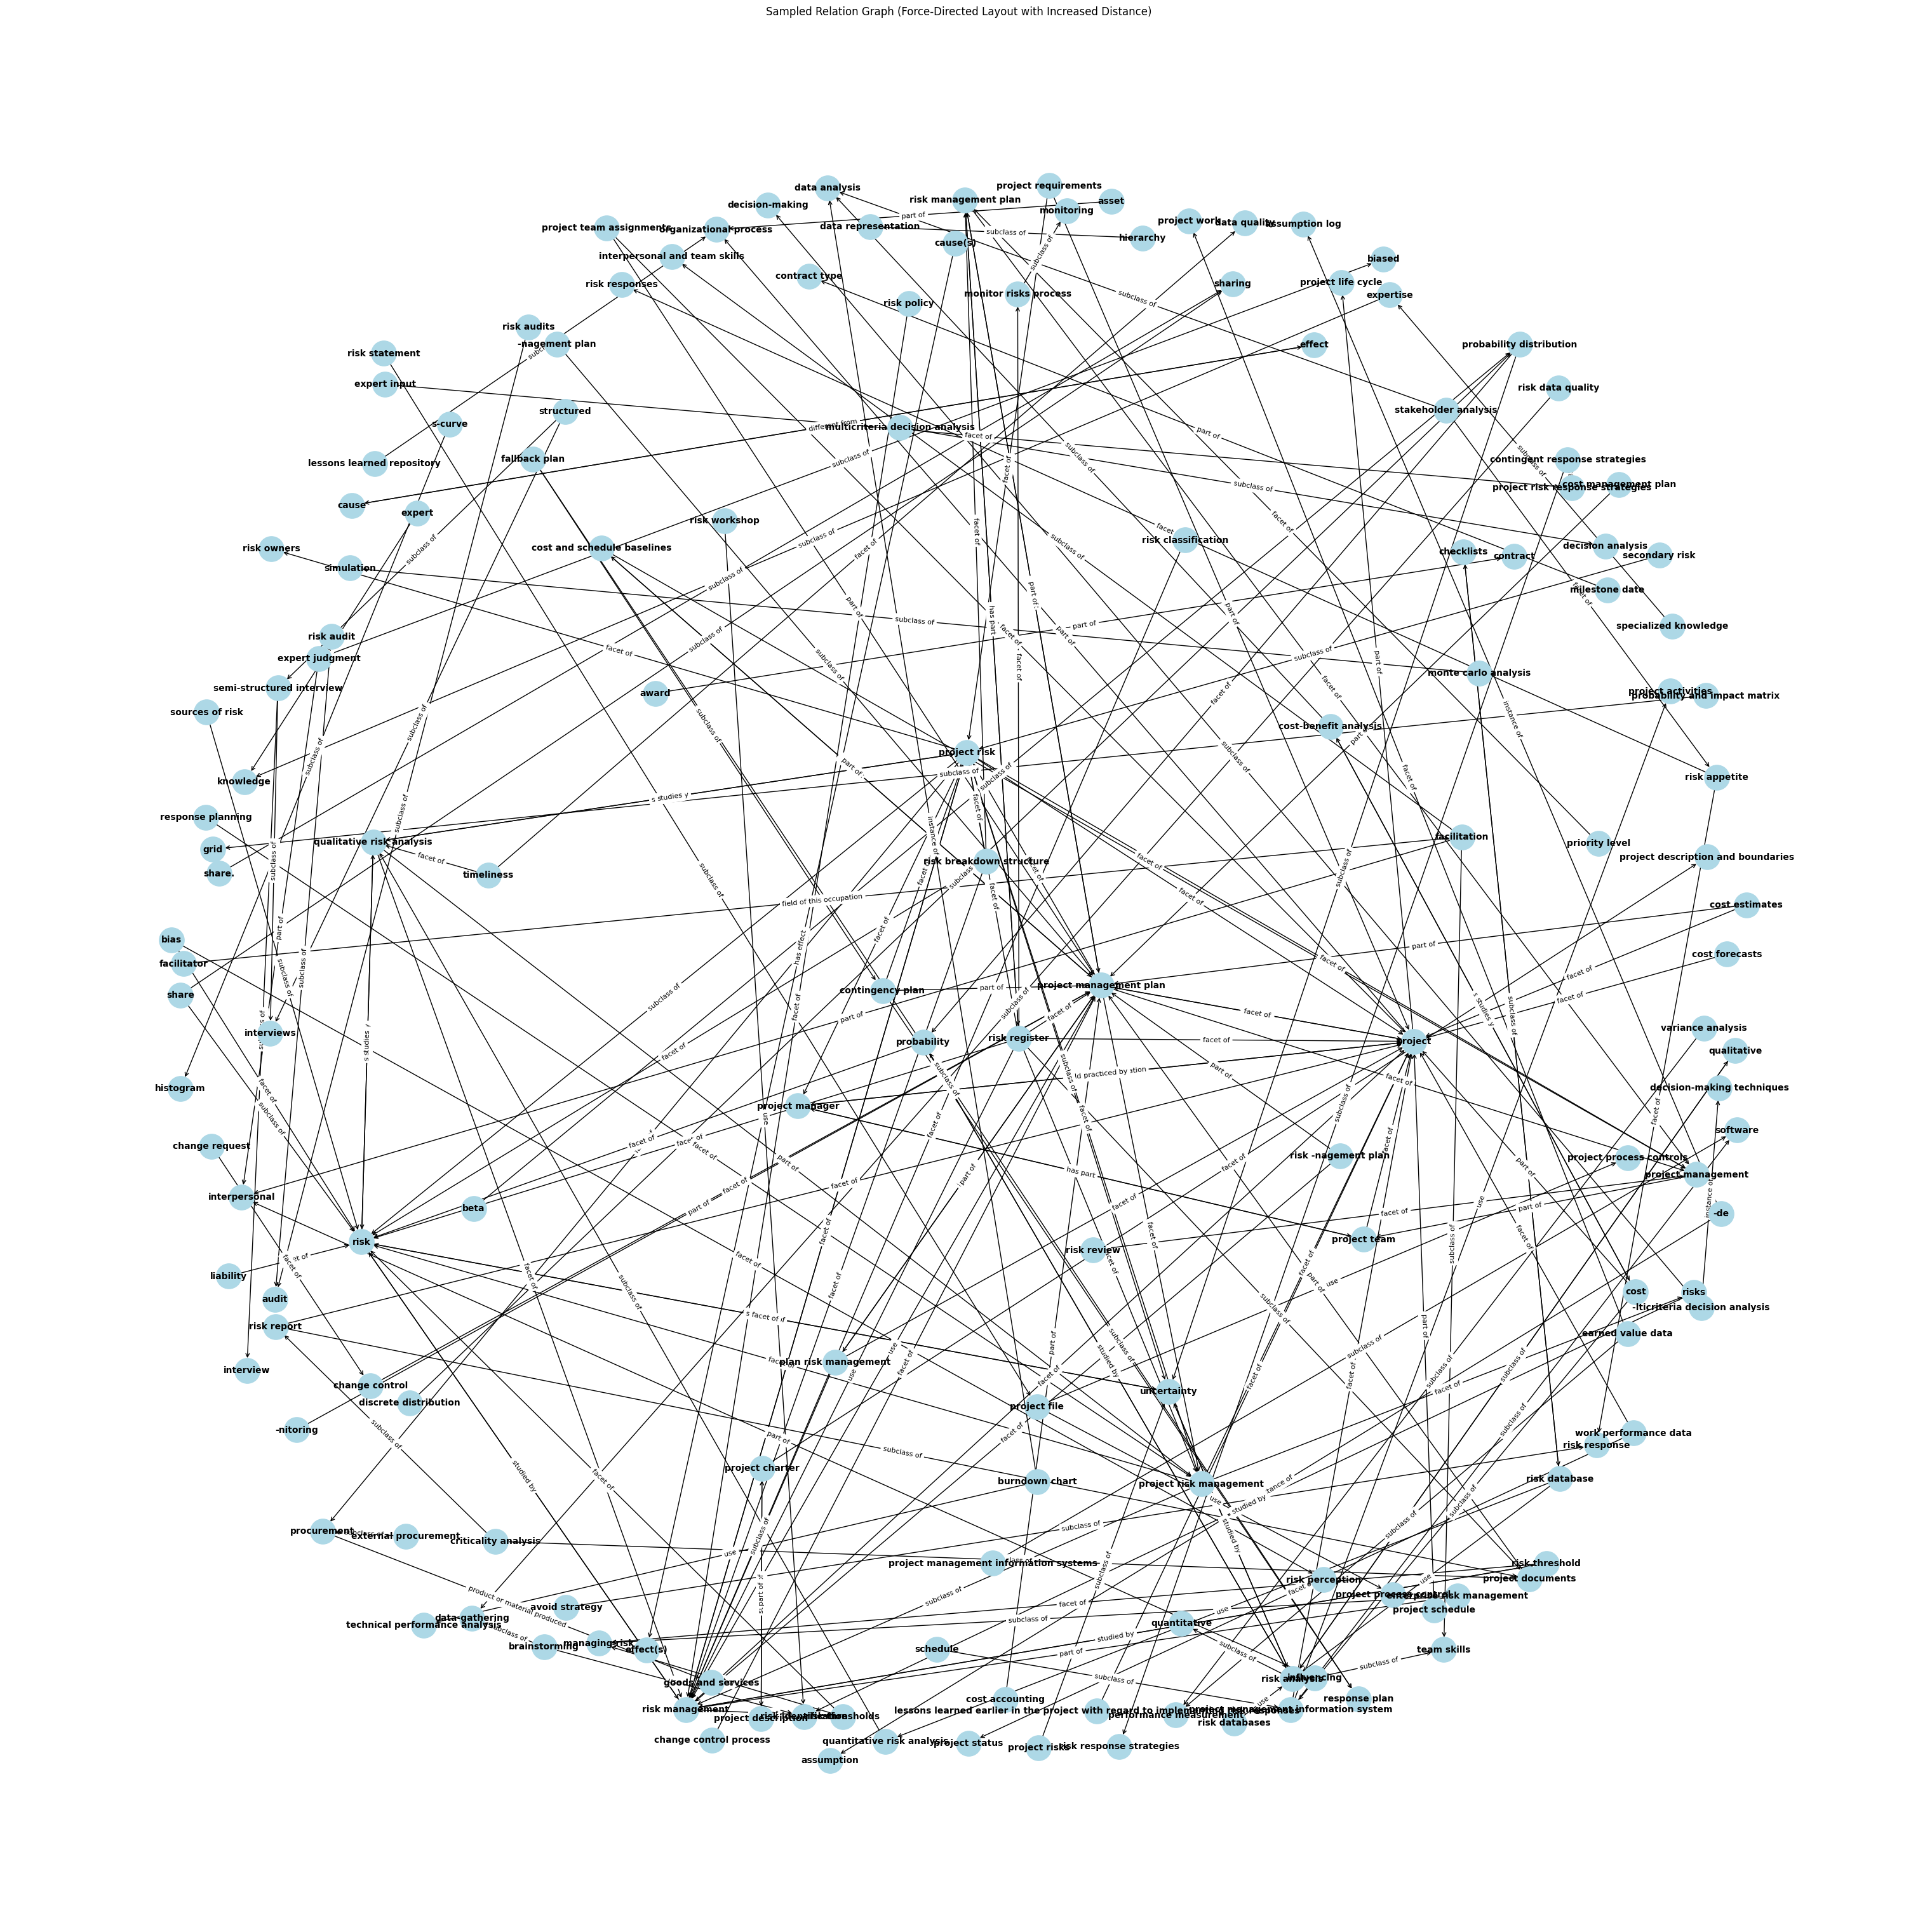

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample a subset of triplets from the DataFrame
sample_size = 339  # Adjust the number of triplets to sample
sampled_triplets = triplet3.sample(sample_size, random_state=180)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the sampled triplets
for _, row in sampled_triplets.iterrows():  # Iterate over sampled data
    head = row['head']
    tail = row['tail']
    relation = row['type']

    if pd.notna(relation) and relation and pd.notna(tail) and tail:  # Check for both 'Type_relation' and 'Concept_of_type_relation'
        G.add_node(head)
        G.add_node(tail)
        G.add_edge(head, tail, relation=relation)

# Define node positions using a force-directed layout with increased distance (k)
k = 1  # Adjust this value to control the distance between nodes
pos = nx.spring_layout(G, seed=80, k=k)

# Draw the graph
plt.figure(figsize=(30, 30))
node_labels = {node: node for node in G.nodes()}
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=800, node_color="lightblue", font_size=10, font_weight="bold", arrowstyle="->")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the graph
plt.title("Sampled Relation Graph (Force-Directed Layout with Increased Distance)")
plt.axis("off")
plt.show()


In [ ]:
from pyvis.network import Network

# Create an empty graph with cdn_resources set to 'remote'
G = Network(height="750px", width="100%", notebook=True, cdn_resources='remote')

# Add nodes and edges from the sampled triplets
for _, row in sampled_triplets.iterrows():
    head = row['head']
    tail = row['tail']
    relation = row['type']

    if pd.notna(relation) and relation and pd.notna(tail) and tail:
        G.add_node(head)
        G.add_node(tail)
        G.add_edge(head, tail, title=relation)

# Show the graph
G.show("interactive_graph.html")

# The graph will be saved as an HTML file that you can open in your web browser.


In [ ]:
#Display to visualize the central characters and how they are all connected.

from IPython.core.display import display, HTML
display(HTML("interactive_graph.html"))
